# **MultiClass Classification**

*   data generator's `class_mode = 'categorical'`
*   activation function of output layer is `'softmax'`
*   In model compile, `loss = 'categorical_crossentropy'`



In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-07-28 18:55:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   151MB/s    in 1.3s    

2020-07-28 18:55:03 (151 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-07-28 18:55:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving t

In [ ]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock = os.listdir(rock_dir)
paper = os.listdir(paper_dir)
scissors = os.listdir(scissors_dir)
print(rock[:5], paper[:5], scissors[:5], sep='\n')

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock02-064.png', 'rock07-k03-049.png', 'rock02-112.png', 'rock03-044.png', 'rock07-k03-081.png']
['paper03-049.png', 'paper07-089.png', 'paper04-116.png', 'paper07-013.png', 'paper05-032.png']
['scissors01-002.png', 'testscissors03-014.png', 'scissors03-017.png', 'testscissors02-002.png', 'scissors04-006.png']


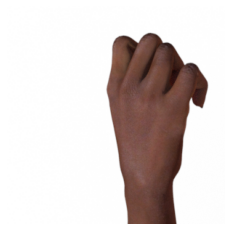

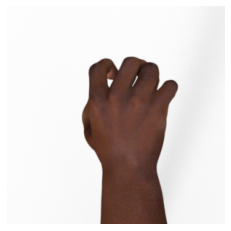

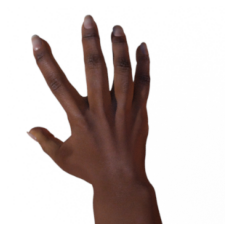

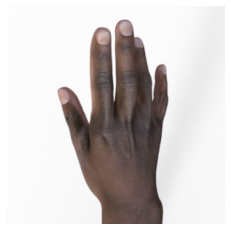

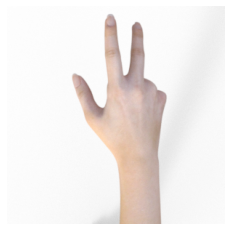

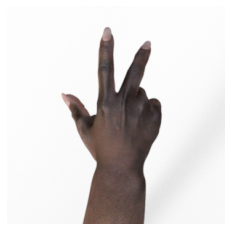

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock[0:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper[0:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors[0:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

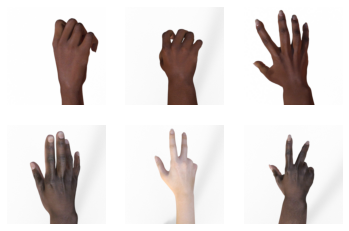

In [ ]:
import matplotlib.pyplot as plt
from itertools import product

fig = plt.figure(figsize=(6,4))
index = 0
ls_folder = [rock_dir,paper_dir, scissors_dir]
ls_pic = [rock[:2],paper[:2],scissors[:2]]
for i,j in product(range(3), range(2)):
    fname = ls_pic[i][j]
    img_path = os.path.join(ls_folder[i],fname)
    index += 1
    ax = fig.add_subplot(2,3, index)
    img = mpimg.imread(img_path)
    plt.axis('Off')
    ax.imshow(img)

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

train_dir = "/tmp/rps/"
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range =40,
    width_shift_range =0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_dir = "/tmp/rps-test-set/"
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_datagenerator = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(150,150),
                                                        class_mode ='categorical')

valid_datagenerator = valid_datagen.flow_from_directory(valid_dir,
                                                        target_size=(150,150),
                                                        class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history = model.fit(train_datagenerator, 
                              epochs=25, 
                              validation_data = valid_datagenerator, 
                              verbose = 1)

Epoch 1/25
20/20 [==============================] - 170s 8s/step - loss: 1.8665 - accuracy: 0.3683 - val_loss: 1.0776 - val_accuracy: 0.5215
Epoch 2/25
20/20 [==============================] - 164s 8s/step - loss: 1.0677 - accuracy: 0.4155 - val_loss: 1.0388 - val_accuracy: 0.5457
Epoch 3/25
20/20 [==============================] - 164s 8s/step - loss: 1.0470 - accuracy: 0.4524 - val_loss: 0.9211 - val_accuracy: 0.5269
Epoch 4/25
20/20 [==============================] - 165s 8s/step - loss: 0.9698 - accuracy: 0.5385 - val_loss: 1.1004 - val_accuracy: 0.4624
Epoch 5/25
20/20 [==============================] - 163s 8s/step - loss: 0.8482 - accuracy: 0.6075 - val_loss: 0.4396 - val_accuracy: 0.9731
Epoch 6/25
20/20 [==============================] - 162s 8s/step - loss: 0.7969 - accuracy: 0.6425 - val_loss: 0.6779 - val_accuracy: 0.6452
Epoch 7/25
20/20 [==============================] - 166s 8s/step - loss: 0.6290 - accuracy: 0.7504 - val_loss: 0.3202 - val_accuracy: 0.9839
Epoch 8/25
20

In [ ]:
model.save("rps.h5")

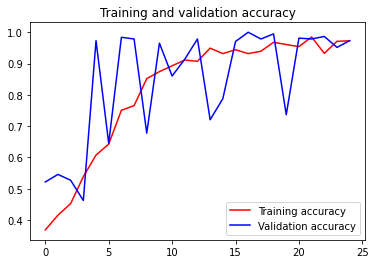

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(len(acc)), acc, 'r', label='Training accuracy')
plt.plot(range(len(acc)), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

- Why does the DNN for Fashion MNIST have 10 output neurons?
   - Because the dataset has 10 classes (10 different pieces of fashion items).
- What is a convolution?
   - A technique to extract features from an image.
- Applying convolutions on top of a DNN will have what impact on training?
   - It depends on many factors. It might make your training faster or slower, and a poorly designed convolutional layer may even be less efficient than a plain DNN!
- What method within an ImageGenerator is used to normalize the image?
   - `rescale` — example: `train_datagen = ImageDataGenerator(rescale=1./255)`
- When using Image Augmentation with the ImageDataGenerator, what happens to your raw image data on-disk?
   - Nothing. All augmentation happens in memory.
- Can you use Image Augmentation with Transfer Learning?
   - Yes. The pre-trained layers of a previously trained model get frozen. So you can augment your images as you train the bottom layers of the DNN with them.
- When training for multiple classes what is the Class Mode for Image Augmentation?
   - `class_mode='categorical'`
- Example of adding an extra axis to NumPy arrays: